# Movie Recommendation System

DataSet Information:

This dataset has been downloaded from Kaggle database URL : https://www.kaggle.com/datasets/shivamb/netflix-shows

Description: this dataset provides data related to Netflix movies an Tv shows, the columns are as below:

1. Show_id: Unique ID for every Movie / Tv Show

2. Type: Identifier - A Movie or TV Show

3. Title: Title of the Movie / Tv Show

4. Director: Director of the Movie

5. Cast: Actors involved in the movie / show

6. Country: Country where the movie / show was produced

7. Date_added: Date it was added on Netflix

8. Release_year: Actual Release year of the move / show

9. Rating: TV Rating of the movie / show

10. Duration: Total Duration - in minutes or number of seasons

11. Listed_in: Genere

12. Description: The summary description

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from plotly.offline import *
import seaborn as sb
import plotly.express as px
from sklearn.preprocessing import MultiLabelBinarizer 
import seaborn as sns
import matplotlib.colors
from PIL import Image
from collections import Counter
import plotly.express as px
import warnings
import missingno
from collections import Counter
from plotly.subplots import make_subplots
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import time 
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import MiniBatchKMeans
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import davies_bouldin_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")

## data preprocessing and visualization

In [4]:
my_df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
my_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
my_df.shape

(8807, 12)

There are 8807 rows and 12 columns in our DataFrame

In [6]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### For finding the null values :

In [7]:
for i in range(len(my_df.isnull().sum())):
    if my_df.isnull().sum()[i] > 0:
        print('Total Number of missing values in ' + my_df.isnull().sum().index[i] + ' : ',my_df.isnull().sum()[i])

Total Number of missing values in director :  2634
Total Number of missing values in cast :  825
Total Number of missing values in country :  831
Total Number of missing values in date_added :  10
Total Number of missing values in rating :  4
Total Number of missing values in duration :  3


#### Plot missing values in columns

Text(0.5, 1.0, 'Number of missing value\n')

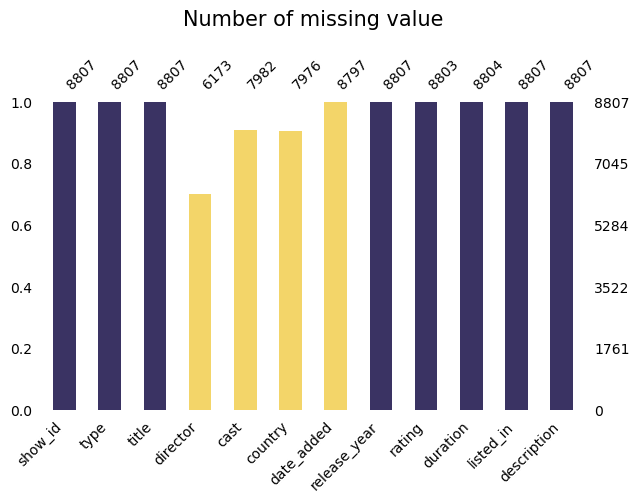

In [8]:
color= ['#3A3363','#3A3363','#3A3363','#F3D569','#F3D569','#F3D569','#F3D569','#3A3363','#3A3363','#3A3363','#3A3363','#3A3363']
missingno.bar(my_df,fontsize=10,color=color,figsize=(7,4))

plt.title('Number of missing value\n',fontsize=15)

## Handling missing values

<div style="text-align: justify"> The director, cast, country, date_added, rating and duration columns contain missing values. We can fill in the missing values with UnKnown. For rating column we can search and find the correct value. Also, we don't need the duration anddate_added columns so we can eliminate them.</div>

In [9]:
my_df.drop(['duration','date_added'], axis=1 ,inplace=True)

In [10]:
my_df['director'] = my_df['director'].fillna('UnKnown')
my_df['country'] = my_df['country'].fillna('UnKnown')
my_df['cast'] = my_df['cast'].fillna('UnKnown')


#### Replace the corresponding ratings in the 'rating' column

In [11]:
rating_replacements = {5989: 'TV-PG', 6827: 'TV-14', 7312: 'PG', 7537: 'PG-13'}
for index, rating in rating_replacements.items():
    my_df.loc[index, 'rating'] = rating
    
my_df['rating'].isnull().any()

False

The input file contains incorrect rating data for some titles; therefore, it is necessary to rectify it by cross-checking the rating online.

In [12]:
my_df['rating'] = my_df['rating'].replace({'74 min': 'TV-MA', '84 min': 'TV-MA', '66 min': 'TV-MA'})
my_df['rating'] = my_df['rating'].replace({'TV-Y7-FV': 'TV-Y7'})

In [13]:
my_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
listed_in       0
description     0
dtype: int64

All the missing values in the dataset have either been removed or filled. There are no missing values left

In [14]:
my_df.duplicated().sum()

0

dataset has not any duplicated values.


#### Rename the 'rating' column's values for easy understanding:


In [15]:
my_df['rating'] = my_df['rating'].replace({
                                            'TV-MA': 'Adults',
                                            'R': 'Adults',
                                            'TV-Y': 'Kids',
                                            'TV-G': 'Kids',
                                            'G': 'Kids',
                                            'PG-13': 'Teens - Age above 12',
                                            'PG': 'Kids - with parental guidence',
                                            'TV-PG': 'Kids - with parental guidence',
                                            'TV-14': 'Teens - Age above 14',
                                            'TV-Y7': 'Kids - Age above 7',
                                            'NC-17': 'Adults',
                                            'UR' : 'UR',
                                            'NR': 'NR'
                                          })

my_df['rating'].unique()

array(['Teens - Age above 12', 'Adults', 'Kids - with parental guidence',
       'Teens - Age above 14', 'Kids', 'Kids - Age above 7', 'NR', 'UR'],
      dtype=object)

The number of movie and TV show in DataFrame

In [16]:
mydf_type = my_df.groupby('type')['show_id'].count().reset_index()
mydf_type = mydf_type.rename(columns = {"show_id":"count_showids"})
mydf_type

,type,count_showids
0,Movie,6131
1,TV Show,2676


## Bag Of Words

 <div style="text-align: justify">We will face difficulties while dealing with the director, cast, and listed_in attributes as the data in these columns is a comma-separated list of values for all directors, actors, and genres of the movie or TV show. To tackle this issue, we will apply a bag-of-words approach on these columns. Firstly, we will only keep the first three values in each column and discard the remaining values. Then, we will create a bag of words for each record by extracting words from these attributes. Later on, we can calculate the similarity between these bags of words using cosine similarity.</div>


In [17]:
my_df_new = my_df.copy()

bag_of_words_data = ['director', 'cast', 'listed_in','description']

for col in bag_of_words_data:
    my_df_new[col] = my_df_new[col].astype(str).map(lambda x : x.lower().replace(' ', '').split(',')[:3])

my_df_new['bag_of_words'] = ''

for i, row in my_df_new.iterrows():
    words = [' '.join(row[col]) for col in bag_of_words_data]
    my_df_new.loc[i, 'bag_of_words'] = ' '.join(words)

my_df_new.head()

,show_id,type,title,director,cast,country,release_year,rating,listed_in,description,bag_of_words
0,s1,Movie,Dick Johnson Is Dead,[kirstenjohnson],[unknown],United States,2020,Teens - Age above 12,[documentaries],"[asherfathernearstheendofhislife, filmmakerkir...",kirstenjohnson unknown documentaries asherfath...
1,s2,TV Show,Blood & Water,[unknown],"[amaqamata, khosingema, gailmabalane]",South Africa,2021,Adults,"[internationaltvshows, tvdramas, tvmysteries]","[aftercrossingpathsataparty, acapetownteensets...",unknown amaqamata khosingema gailmabalane inte...
2,s3,TV Show,Ganglands,[julienleclercq],"[samibouajila, tracygotoas, samueljouy]",UnKnown,2021,Adults,"[crimetvshows, internationaltvshows, tvaction&...","[toprotecthisfamilyfromapowerfuldruglord, skil...",julienleclercq samibouajila tracygotoas samuel...
3,s4,TV Show,Jailbirds New Orleans,[unknown],[unknown],UnKnown,2021,Adults,"[docuseries, realitytv]","[feuds, flirtationsandtoilettalkgodownamongthe...",unknown unknown docuseries realitytv feuds fli...
4,s5,TV Show,Kota Factory,[unknown],"[mayurmore, jitendrakumar, ranjanraj]",India,2021,Adults,"[internationaltvshows, romantictvshows, tvcome...",[inacityofcoachingcentersknowntotrainindia’sfi...,unknown mayurmore jitendrakumar ranjanraj inte...


<b>CountVectorizer</b> will used to convert a collection of text documents into a matrix of word counts.

In [18]:
vectorizer = CountVectorizer(max_df=0.4,        
                             min_df=1,     
                             stop_words='english',
                             lowercase=True, 
                             ngram_range=(1,3)
                            )

count_matrix = vectorizer.fit_transform(my_df_new['bag_of_words'])

* The <b>"max_df"</b> parameter is set to 0.4, which means that words that occur in more than 40% of the documents will be dropped. 
* The <b>"min_df"</b> parameter is set to 1, which means that only words that appear at least once will be included.
* The <b>"stop_words"</b> parameter is set to 'english', which means that common English stop words like "the", "a", and "an" will be removed.
* The <b>"lowercase"</b> parameter is set to True, which means that all text will be converted to lowercase. 
* The <b>"ngram_range"</b> represents the range of n-grams. An n-gram is a contiguous sequence of n words from a given text.

# Data Visualization

## Number of Movies vs TV Shows

The dataset has two values in the "type" column - <b>"Movie" </b>and <b>"TV show"</b>.




In [22]:
mydf_col = "type"
type_group = my_df[mydf_col].value_counts().reset_index()
type_group = type_group.rename(columns = {mydf_col : "count", "index" : mydf_col})


trace = go.Pie(labels=type_group[mydf_col], values=type_group['count'], pull=[0.05, 0],
               marker=dict(colors=["#3A3363", "#F3D569"]))

layout = go.Layout(title="", height=500, legend=dict(x=0.15, y=1.1) , template='plotly_white')
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

 <div style="text-align: justify"> we can see, the "Movie" category accounts for 69.6% of the total content, while the "TV show" category accounts for 30.4%. This means that Netflix has more movies than TV shows. The majority of the content on Netflix is made up of movies, while TV shows represent a smaller portion of the pie chart. </div>

## Age Rating

In [23]:
mydf_TV = my_df[my_df['type'] == 'TV Show']

fig = px.histogram(my_df, x='rating', color='type',
                   color_discrete_sequence=px.colors.qualitative.Pastel,
                   nbins=len(mydf_TV["rating"].unique()))

fig.update_layout(
    template='plotly_white',
    xaxis_title='Age Rating',
    yaxis_title='Count',
)

fig.show()

Most people of all age ranges prefer to watch movies over TV shows.

## Top countries with the highest number of content 

In [24]:
my_df_plot = my_df.copy()

mydf_country = my_df_plot['country'].value_counts().reset_index()[:15]
mydf_country = mydf_country[mydf_country['index'] != 'UnKnown']

trace1 = go.Bar(
                x = mydf_country['index'],
                y = mydf_country['country'],
                marker = dict(color = 'rgb(243,212,105)',
                              line=dict(color='rgb(243,212,105)',width=1.5)))

layout = go.Layout(template= "plotly_white",title = 'TOP COUNTERIES WITH THE HIGHT NUMBER OF CONTENT' ,
                   xaxis = dict(title = 'Countries'), yaxis = dict(title = 'Count'))

fig = go.Figure(data = [trace1], layout = layout)
fig.show()


This chart would help you understand the relationship between the countries and the relative number of movie contents produced by each. As you can see, The United States produces approximately 2700 movie contents, which is a significantly larger number than the movie contents produced by other countries.

## Top movies' directors from U.K.

In [25]:
my_director = my_df[my_df['type']=='Movie']
my_director = my_director[my_director['country']=='United Kingdom']
my_director = my_director[my_director['director'].notnull()] 
directors = my_director['director'].astype(str)

counter_list = Counter(directors).most_common(11)
counter_list = [_ for _ in counter_list if _[0] != "UnKnown"]  # exclude "Unknown" values

labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]

trace1 = go.Bar(
                x = labels,
                y = values,
                marker = dict(color = 'rgb(243,212,105)',
                              line=dict(color='rgb(243,212,105)',width=1.5)))

layout = go.Layout(template= "plotly_white",title = 'TOP 10 MOVIES DIRECTORS FROM U.K. WITH MOST CONTENT' ,
                   xaxis = dict(title = 'Directors' ,color = 'rgb(58,51,99)' ), yaxis = dict(title = 'Count',color = 'rgb(58,51,99)'))

fig = go.Figure(data = [trace1], layout = layout)
fig.show()


The chart shows top ten movie’s directors from a specific country. For instance, in U.K, the Edward Cotterill has produced the most movie contents.

## Top movies' actors from U.K.

In [26]:
cast_df = my_df[my_df['type']=='Movie']

cast_df = cast_df[cast_df['country']=='United Kingdom']

categories = ", ".join(cast_df['cast'].fillna("")).split(", ")

li_counter = Counter(categories).most_common(11)
li_counter = [_ for _ in li_counter if _[0] != "UnKnown"]  # exclude "Unknown" values

li_counter = [_ for _ in li_counter if _[0] != ""]
labels = [_[0] for _ in li_counter][::-1]
values = [_[1] for _ in li_counter][::-1]

trace1 = go.Bar(
                x = labels,
                y = values,
                marker = dict(color = 'rgb(58,51,99)',
                              line=dict(color='rgb(58,51,99)',width=1.5)))

layout = go.Layout(template= "plotly_white",title = 'TOP 10 MOVIES ACTORS FROM U.K. WITH MOST CONTENT' ,
                   xaxis = dict(title = 'ACTORS'), yaxis = dict(title = 'Count'))

fig = go.Figure(data = [trace1], layout = layout)
fig.show()

David Attenborough is also an actor with most movies and after that there are four actors, John Cleese, Eric Idle, Terry Gilliam and Terry Jones.

## Director and actor with most contents

In [27]:
mydf_temp = my_df[my_df['type']=='TV Show']
mydf_temp = mydf_temp[mydf_temp['country']=='United Kingdom']

categories1 = ", ".join(mydf_temp['director'].fillna("")).split(", ")
counter_list1 = Counter(categories1).most_common(11)
counter_list1 = [_ for _ in counter_list1 if _[0] != "UnKnown"]  

labels1 = [_[0] for _ in counter_list1][::-1]
values1 = [_[1] for _ in counter_list1][::-1]

mydf_temp2 = my_df[my_df['type']=='TV Show']
mydf_temp2 = mydf_temp2[mydf_temp2['country']=='United Kingdom']

categories2 = ", ".join(mydf_temp2['cast'].fillna("")).split(", ")
counter_list2 = Counter(categories2).most_common(11)
counter_list2 = [_ for _ in counter_list2 if _[0] != "UnKnown"]  

labels2 = [_[0] for _ in counter_list2][::-1]
values2 = [_[1] for _ in counter_list2][::-1]


fig = make_subplots(rows=1, cols=2,subplot_titles=("Directors", "Actors"))

trace1 = go.Bar(
                x = labels1,
                y = values1,
                marker = dict(color = 'rgb(58,51,99)',
                              line=dict(color='rgb(58,51,99)',width=1.5))
               )

trace2 = go.Bar(
                x = labels2,
                y = values2,
                marker = dict(color = 'rgb(243,212,105)',
                              line=dict(color='rgb(243,212,105)',width=1.5))
               
                )

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.update_layout(height=600, width=600,template= "plotly_white",title_text = 
                  'DIRECTORS AND ACTORS WITH MOST CONTENT FROM U.K.')
fig.show()

The David Attenborough as a Director and Alastair Fothergill as a actor have the highest number of TV show credits among all the content available on Netflix.

## Title word cloud

In [86]:
'''
import requests

url = 'https://www.manolight.ir/wp-content/uploads/2023/04/icon1.jpg'
response = requests.get(url)

with open('icon1.jpg', 'wb') as f:
    f.write(response.content)
    
text = str(list(my_df['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '')

plt.rcParams['figure.figsize'] = (10, 10)

mask = np.array(Image.open('icon1.jpg'))

wordcloud = WordCloud(width=1200, height=1200, max_words=121, background_color="white", mask=mask).generate(str(text))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


ConnectionError: HTTPSConnectionPool(host='www.manolight.ir', port=443): Max retries exceeded with url: /wp-content/uploads/2023/04/icon1.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x727065a3d290>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))

The word cloud shows the most commonly occurring words in the titles which in this case are Love, Girl, Man, Life. It's noteworthy that numerous movies have similar keywords in their titles.

## Genre Correlation

<div style="text-align: justify"> we defined a colormap, followed by a function named "genre_heatmap". This function creates a new column named "genre". The values in this column are extracted from the "listed_in" column by splitting the comma-separated values and creating a list of genres for each row.
It extracts all unique genres from the "genre" column and then convert the "genre" column into a binary matrix where each row represents a movie or TV show and each column represents a genre. 
A value of 1 in a cell indicates that the corresponding movie or TV show belongs to that genre, while a value of 0 indicates that it does not.It computes the correlation matrix between the genres and creates a heatmap to visualize the correlation matrix. </div>


There are 20 types in the Netflix Movie Dataset


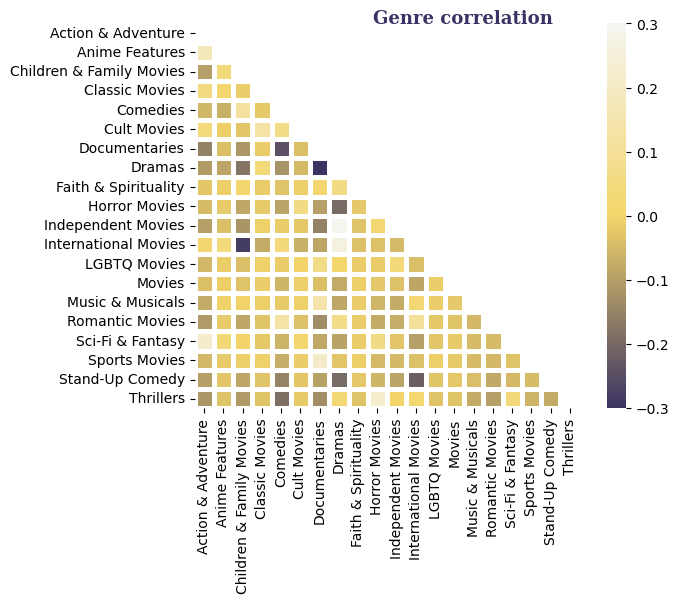

In [29]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#3A3363', '#F3D569','#f5f5f1'])



def genre_heatmap(my_df, title):
    my_df['genre'] = my_df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in my_df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
    test = my_df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(7, 5))
    fig.text(.45,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=13, color='#3A3363')

    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()
    
df_tv = my_df[my_df["type"] == "TV Show"]
df_movies = my_df[my_df["type"] == "Movie"]


genre_heatmap(df_movies, 'Movie')
plt.show()

 <div style="text-align: justify">The chart shows that there is a strong association between independent movies and dramas. In other words, independent movies are much more likely to be in the drama genre. Additionally, the chart reveals that there are very few international movies in the children's genre.</div>

# Recommendation System (Content-Based)

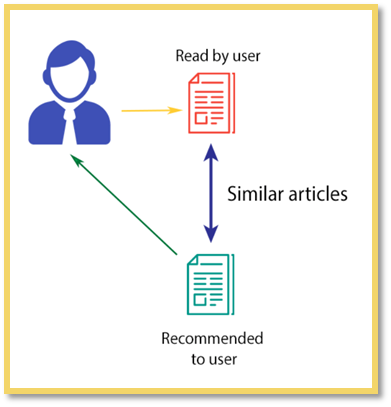

In our project, we use content-based recommender system with clustering methods.
The content of the movie (cast, description, director,genre etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

# Method 1: Clustering 

<div style="text-align: justify"> Our approach involves computing similarity scores for all movies by using their features such as 'director', 'cast', 'listed_in','description', and then suggesting movies based on those scores. To ensure that the frequency of words in these features does not dominate the calculation of similarity scores, we will convert the word vector of each overview. We generated  <b> CountVectorizer  </b> vectors in pre-proccessing step. This approach considers the overall frequency of each word in the documents. By doing so, we can reduce the impact of words that occur frequently in these features, and therefore minimize their influence on the final similarity score computation </div>


In [87]:
features=['listed_in','director','cast','description','title']

filters = my_df[features] 

In [88]:
similarities = cosine_similarity(count_matrix, count_matrix)

filters=filters.reset_index()

indices = pd.Series(filters.index, index=filters['title'])

<div style="text-align: justify"> The get_recommendations_new function takes in a movie title and a cosine similarity matrix as input.

The function first retrieves the index of the movie that matches the title in the metadata DataFrame by using the indices series that was created earlier. Using this index, the function computes the cosine similarity scores between the selected movie and all other movies in the metadata DataFrame using the cosine_sim matrix. It then sorts the movies based on their similarity scores in descending order, and selects the top 5 most similar movies (excluding the input movie itself). Finally, the function returns the titles of the top 5 most similar movies from the metadata DataFrame.</div>

In [89]:
def get_recommendations_new(title, cosine_sim=similarities):
        
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:6]

    movie_indices = [i[0] for i in sim_scores]

    return my_df['title'].iloc[movie_indices]

In [90]:
result = get_recommendations_new('Ocean\'s Twelve', similarities)

print("-"*40+"\n Recommendation for 'Ocean's Twelve'\n"+"-"*40)

print(result.head())

----------------------------------------
 Recommendation for 'Ocean's Twelve'
----------------------------------------
7638        Ocean's Thirteen
354       The Last Boy Scout
809          Starsky & Hutch
952     The Whole Nine Yards
4970         Game Over, Man!
Name: title, dtype: object


In [91]:
result = get_recommendations_new('Stranger Things', similarities)

print("-"*40+"\n Recommendation for 'Stranger Things'\n"+"-"*40)

print(result.head())

----------------------------------------
 Recommendation for 'Stranger Things'
----------------------------------------
6953                             Helix
3187                       Nightflyers
1473    Chilling Adventures of Sabrina
8421                    The Messengers
2190              The Umbrella Academy
Name: title, dtype: object


In [92]:
result = get_recommendations_new('PK', similarities)

print("-"*40+"\n Recommendation for 'PK'\n"+"-"*40)

print(result.head())


----------------------------------------
 Recommendation for 'PK'
----------------------------------------
1114                           3 Idiots
195     EMI: Liya Hai To Chukana Padega
4790                  Anthony Kaun Hai?
572                           Hampstead
898                           Dear Affy
Name: title, dtype: object


# Method 2: K-Means Clustering

<div style="text-align: justify"> The purpose of this algorithm is to develop a recommendation system that utilizes a graph structure and evaluates the similarity between nodes using the Adamic Adar measure. This measure indicates the degree of closeness between two nodes, with higher values indicating greater similarity. Instead of pre-calculating the measure between all movies, the recommendation algorithm will explore the neighborhood of the target movie to determine the list of recommended films.</div>

<div style="text-align: justify">Firstly, we will cluster textual data using the K-means clustering algorithm and assign each data point to a specific cluster. Then, set the number of clusters (k) to 200. After that, we will initialize a MiniBatchKMeans object with k clusters and fit the MiniBatchKMeans algorithm to the CountVectorizer that were applied earlier. The MiniBatchKMeans algorithm is a variant of the standard K-means algorithm that is optimized for large datasets. </div>

<div style="text-align: justify">We transform the "description" column into a CountVectorizer using the same vectorizer that was used earlier. This transformed data is assigned to the "request_transform" variable. The MiniBatchKMeans algorithm predict the cluster of each data point in "request_transform" and assign the predicted cluster values to a new column called "cluster". Finally, count the number of data points in each cluster and return the top 5 clusters with the most data points. </div>

In [22]:
k = 200

kmeans = MiniBatchKMeans(n_clusters = k)

kmeans.fit(count_matrix)

centers = kmeans.cluster_centers_.argsort()[:,::-1]

terms = vectorizer.get_feature_names_out()

request_transform = vectorizer.transform(my_df_new['bag_of_words'])

my_df_new['cluster'] = kmeans.predict(request_transform) 

my_df_new['cluster'].value_counts().head()

84     4046
56      596
101     438
26      388
75      352
Name: cluster, dtype: int64

<div style="text-align: justify">We will define a function that takes a sparse matrix, an index of a document, and the number of top similar documents to retrieve, and returns a list of indices of the most similar documents in the matrix based on their cosine similarity with the given document.</div>




In [23]:
def find_similar(CountVectorizer_matrix, index, top_n = 10):
    cosine_similarities = linear_kernel(CountVectorizer_matrix[index:index+1], CountVectorizer_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [index for index in related_docs_indices][0:top_n]  

<div style="text-align: justify">Then we will create a graph using the <b>NetworkX</b> library and populate it with nodes and edges based on the data in our DataFrame. The graph represents movies, actors, categories, directors, and countries as nodes, and relationships between them as edges.</div>

<div style="text-align: justify">The code initializes an empty graph with a label "MOVIE". Then iterates through each row and adds a node to the graph for each movie. The node contains attributes such as the movie's title, show_id, type, and rating. Next creates additional nodes for each actor, category, director, and country associated with the movie and adds edges to connect them to the movie node. 
The find_similar() function find the most similar movies to the current movie based on the CountVectorizer, and adds a node and edges to represent this similarity relationship. Finally, the code prints the time it took to finish creating the graph.</div>

In [24]:
G = nx.Graph(label="MOVIE")

start_time = time.time()

for i, rowi in my_df_new.iterrows():
    if (i%1000==0):
        print(" iter {} -- {} seconds --".format(i,time.time() - start_time))
    G.add_node(rowi['title'],key=rowi['show_id'],label="MOVIE",mtype=rowi['type'],rating=rowi['rating'])

    for element in rowi['cast']:
        G.add_node(element,label="PERSON")
        G.add_edge(rowi['title'], element, label="ACTED_IN")
    for element in rowi['listed_in']:
        G.add_node(element,label="CATEGORY")
        G.add_edge(rowi['title'], element, label="CATEGORY_IN")
    for element in rowi['director']:
        G.add_node(element,label="PERSON")
        G.add_edge(rowi['title'], element, label="DIRECTED")
    for element in rowi['country']:
        G.add_node(element,label="COUNTRY")
        G.add_edge(rowi['title'], element, label="COUNTERY_IN")
    
    indices = find_similar(count_matrix, i, top_n = 10)
    snode="Sim("+rowi['title'][:15].strip()+")" 
    
    G.add_node(snode,label="SIMILAR")
    G.add_edge(rowi['title'], snode, label="SIMILARITY")
    
    for element in indices:
        G.add_edge(snode, my_df_new['title'].loc[element], label="SIMILARITY")
        
print(" finish -- {} seconds --".format(time.time() - start_time))    

 iter 0 -- 0.006344795227050781 seconds --
 iter 1000 -- 7.643877029418945 seconds --
 iter 2000 -- 15.430951118469238 seconds --
 iter 3000 -- 23.217082977294922 seconds --
 iter 4000 -- 30.99001455307007 seconds --
 iter 5000 -- 38.78318643569946 seconds --
 iter 6000 -- 46.716968059539795 seconds --
 iter 7000 -- 54.49635887145996 seconds --
 iter 8000 -- 62.30738353729248 seconds --
 finish -- 68.56220769882202 seconds --


<div style="text-align: justify">The get_all_adj_nodes function takes a list of nodes in the main graph as input and returns a list of all adjacent nodes to those nodes, including the original nodes. This function is used to extract a subgraph that includes the nodes in the input list as well as their neighbors.</div>


<div style="text-align: justify">The draw_sub_graph function takes a list of nodes as input and visualizes the subgraph of the main graph that includes those nodes. The function first creates a subgraph object using the subgraph method of the main graph, then assigns colors to each node based on its label, and finally draws the subgraph using the draw method of the NetworkX library. The resulting plot shows the nodes and edges in the subgraph, with the nodes colored according to their label.</div>


In [25]:
def get_all_adj_nodes(list_in):
    
    sub_graph=set()
    for m in list_in:
        sub_graph.add(m)
        for e in G.neighbors(m):        
                sub_graph.add(e)
    return list(sub_graph)

def draw_sub_graph(sub_graph):
    
    subgraph = G.subgraph(sub_graph)
    colors=[]
    
    for e in subgraph.nodes():
        if G.nodes[e]['label']=="MOVIE":
            colors.append('darkorange')
        elif G.nodes[e]['label']=="PERSON":
            colors.append('paleturquoise')
        elif G.nodes[e]['label']=="CATEGORY":
            colors.append('springgreen')
        elif G.nodes[e]['label']=="COUNTRY":
            colors.append('gold')
        elif G.nodes[e]['label']=="SIMILAR":
            colors.append('blue')    
        elif G.nodes[e]['label']=="CLUSTER":
            colors.append('deeppink')

    nx.draw(subgraph, with_labels=True, font_weight='bold',node_color=colors)
    plt.show()

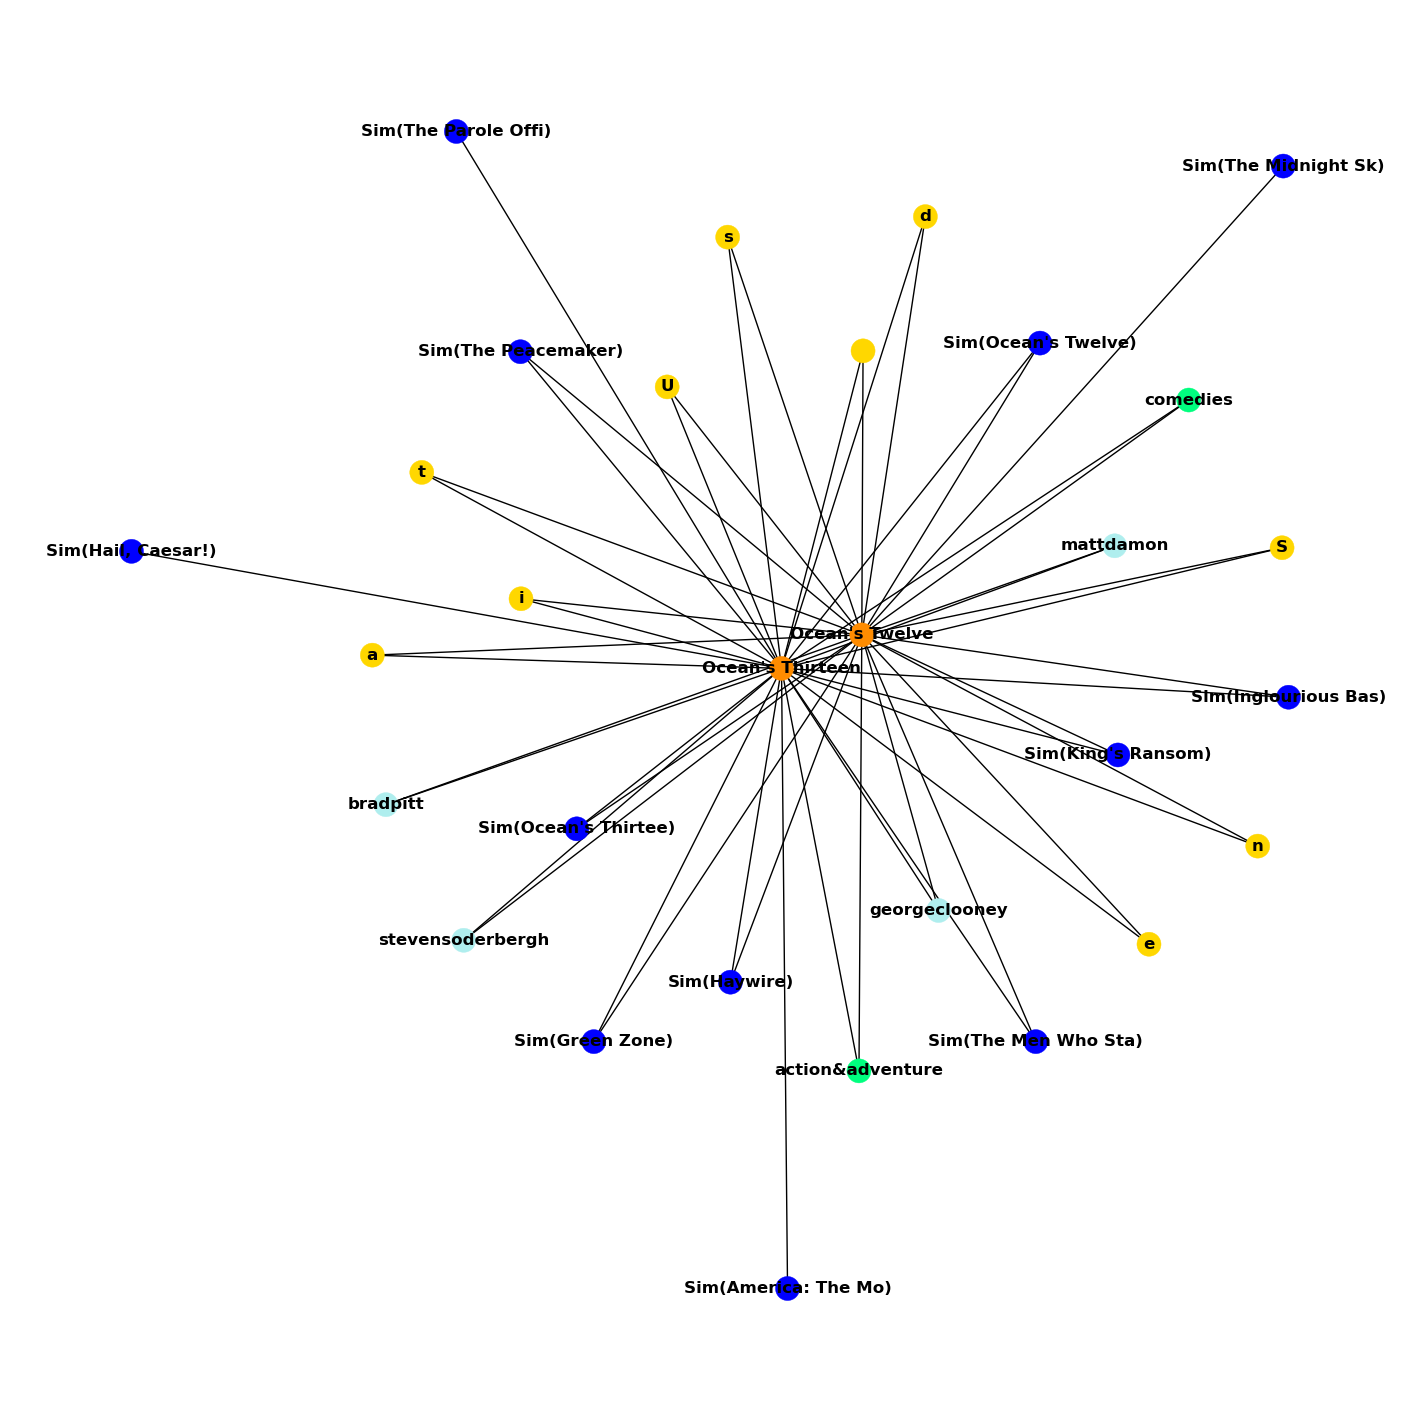

In [26]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14,14]
list_in=["Ocean's Twelve","Ocean's Thirteen"]
sub_graph = get_all_adj_nodes(list_in)
draw_sub_graph(sub_graph)

<div style="text-align: justify">The get_recommendation function takes a movie title as its input and returns recommended movies based on their similarity to the input movie. The function first creates a dictionary named commons_neighbours that stores common neighbors of the input movie with other movies in the graph. For each neighbor of a neighbor that is a movie, a weight is calculated based on the degree of the common neighbor. Then, the function returns a sorted pandas series containing recommended movies and their corresponding weights. Finally, the function is called four times for four different movies, and the top recommended movies are printed for each input movie.</div>

In [93]:
def get_recommendation(root):
    commons_neighbours = {}
    for e in G.neighbors(root):
        for e2 in G.neighbors(e):
            if e2==root:
                continue
            if G.nodes[e2]['label']=="MOVIE":
                commons = commons_neighbours.get(e2)
                if commons==None:
                    commons_neighbours.update({e2 : [e]})
                else:
                    commons.append(e)
                    commons_neighbours.update({e2 : commons})
    
    movies=[]
    weight=[]
    
    for key, values in commons_neighbours.items():
        w=0.0
        for e in values:
            w=w+1/math.log(G.degree(e))
        movies.append(key) 
        weight.append(w)
    
    result = pd.Series(data=np.array(weight),index=movies)
    result.sort_values(inplace=True,ascending=False)        
    return result;

result = get_recommendation("Ocean's Twelve")
print("-"*40+"\n Recommendation for 'Ocean's Twelve'\n"+"-"*40)
print(result.head())

----------------------------------------
 Recommendation for 'Ocean's Twelve'
----------------------------------------
Ocean's Thirteen             6.672296
The Man Who Feels No Pain    3.655610
Up in the Air                2.533039
Hail, Caesar!                2.533039
Good Night, and Good Luck    2.398322
dtype: float64


In [28]:
result2 = get_recommendation("PK")
print("-"*40+"\n Recommendation for 'pk'\n"+"-"*40)
print(result2.head())

----------------------------------------
 Recommendation for 'pk'
----------------------------------------
3 Idiots          4.773419
Dil Chahta Hai    3.863179
Dil               3.863179
Bittoo Boss       3.067224
Lust Stories      2.650191
dtype: float64


In [37]:
result3 = get_recommendation("Stranger Things")
print("-"*40+"\n Recommendation for 'Stranger Things'\n"+"-"*40)
print(result3.head())

----------------------------------------
 Recommendation for 'Stranger Things'
----------------------------------------
Helix                             6.548952
Chilling Adventures of Sabrina    6.131920
Manifest                          5.900304
The 4400                          5.900304
The Messengers                    5.900304
dtype: float64


## Top recommendations

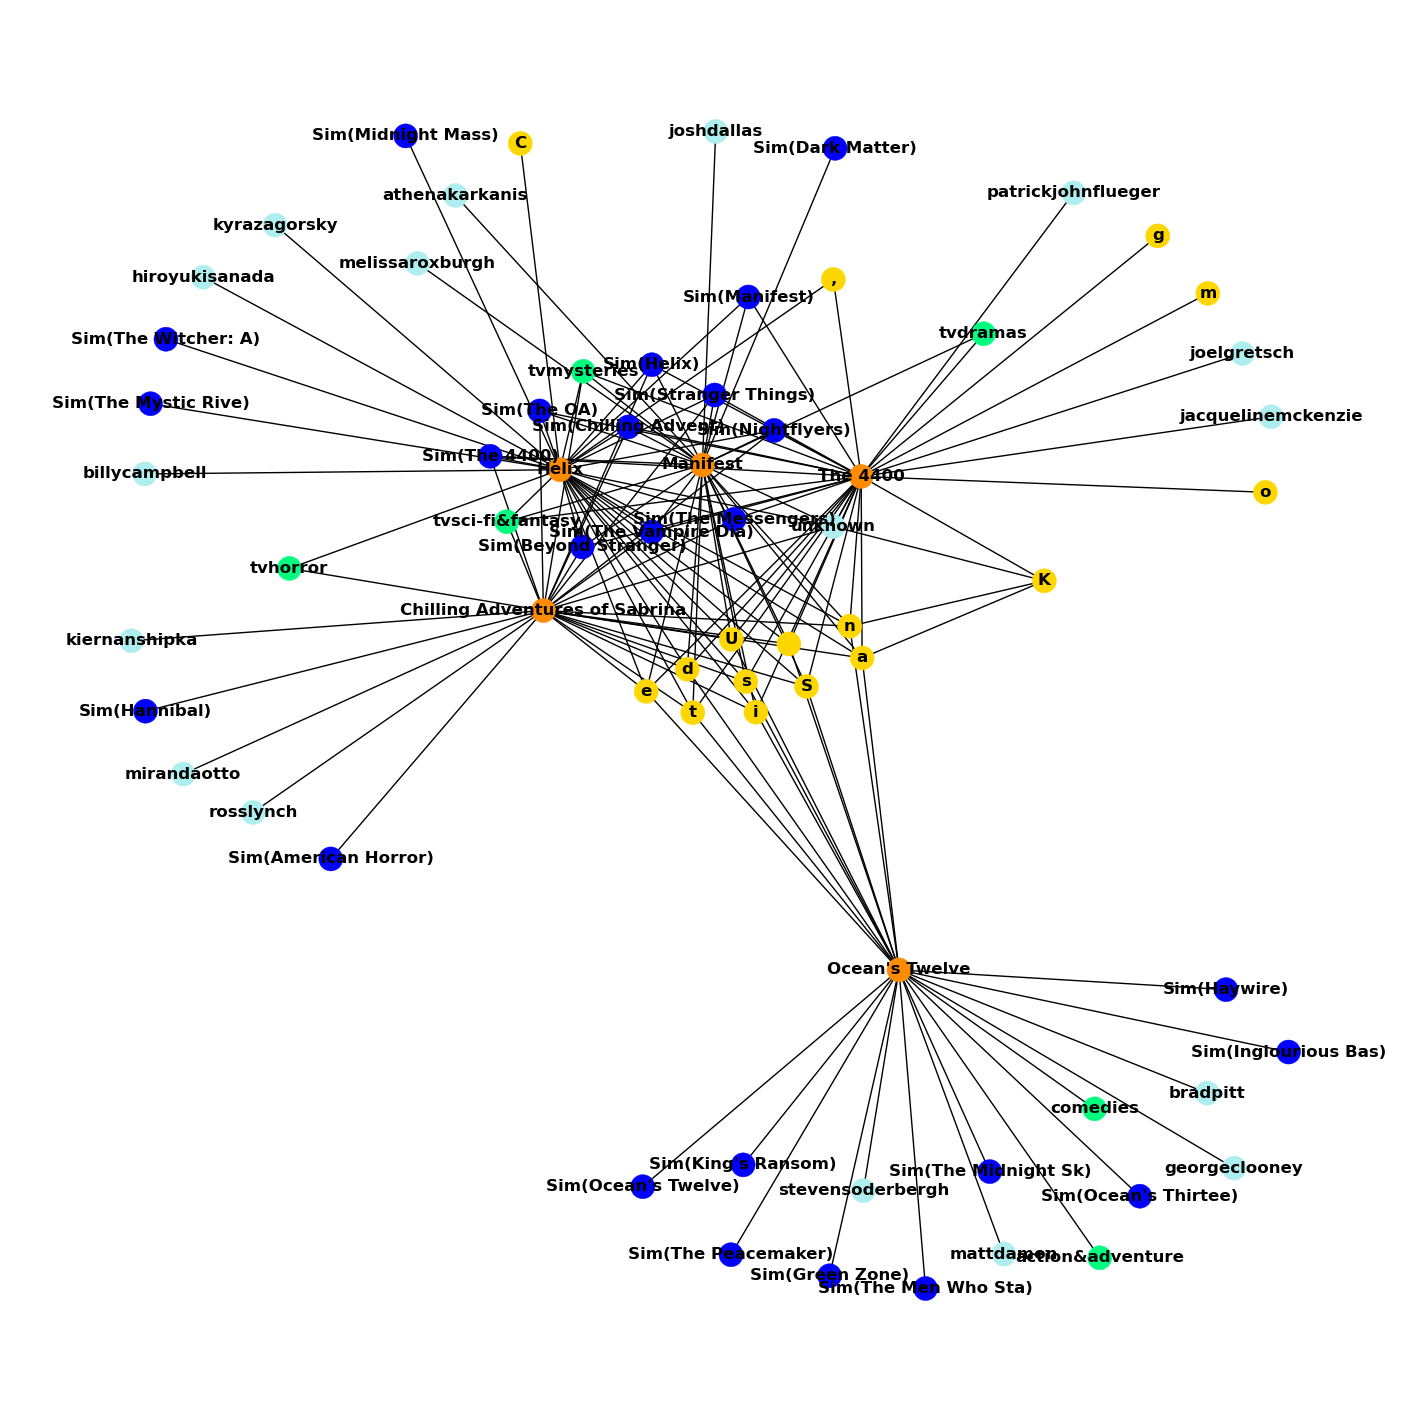

In [38]:
reco=list(result3.index[:4].values)
reco.extend(["Ocean's Twelve"])
sub_graph = get_all_adj_nodes(reco)
draw_sub_graph(sub_graph)

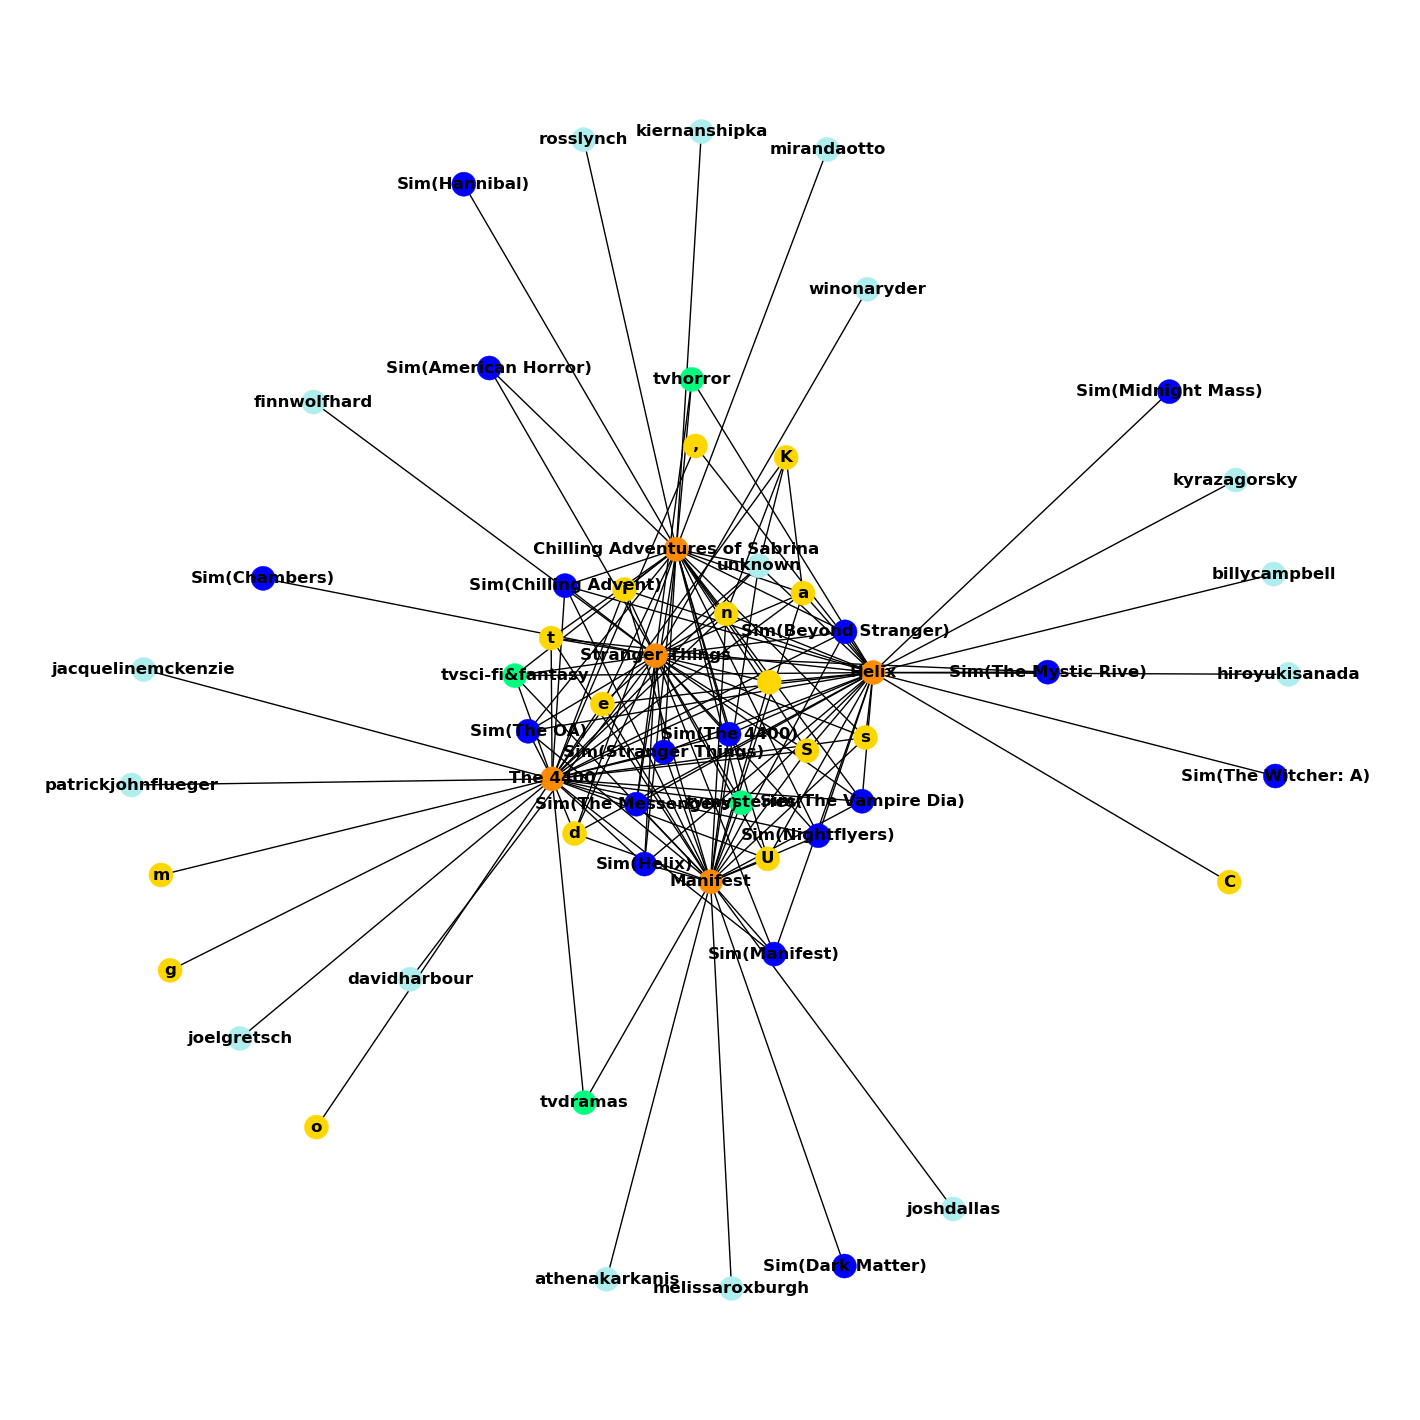

In [39]:
reco=list(result3.index[:4].values)
reco.extend(["Stranger Things"])
sub_graph = get_all_adj_nodes(reco)
draw_sub_graph(sub_graph)

In [40]:
db_index = davies_bouldin_score(count_matrix.toarray(), kmeans.labels_)

print("The Davies-Bouldin index is: {:.3f}".format(db_index))

The Davies-Bouldin index is: 1.405


We computed the Davies-Bouldin index, a measure of cluster validity, using the count matrix obtained from the bag-of-words representation of the input data and the labels obtained from K-means clustering. The computed index value is then printed as output. In this case, the Davies-Bouldin index value is 1.19, which suggests that the clustering results are relatively good, with low intra-cluster distance and high inter-cluster distance.

# Method 3: K Nearest Neighbours (KNN)

<div style="text-align: justify">In this algorithm we want to build a recommendation system by adapting the <b>K Nearest Neighbors algorithm</b> to focus on the most relevant columns. To achieve this, we get columns that are considered helpful in generating recommendations.</div>

In [64]:
features_knn = ['type', 'country','release_year','rating','title']

my_df_knn = my_df[features_knn]

<div style="text-align: justify">We will create <b>dummy variables</b> and use one-hot encode for the categorical columns type, rating, and country. Dummy variables are a way of representing categorical variables as binary variables (0s and 1s) that can be used in statistical models. Then reset the index of the my_df_knn dataframe and drops the previous index, effectively reordering the rows of the dataframe. The drop parameter is set to True to drop the old index column.</div>


In [65]:
my_df_knn = pd.get_dummies(my_df_knn, columns=['type', 'rating', 'country'])

my_df_knn.reset_index(drop=True, inplace=True)

We utilize SKLearn's CountVectorizer in this algorithm also, to build a word count matrix from all the bags of words present in the dataset. With this, we can create a cosine similarity matrix.

In [66]:
similarities = cosine_similarity(count_matrix, count_matrix)

dissimilarities = 1 - similarities


<div style="text-align: justify">We will apply <b>euclidean_distance</b> function, calculates the Euclidean distance between two rows, which is a measure of the overall difference between their feature values. The feature values for each row are taken from all columns in the dataset except for the title, bag_of_words, and release_year columns. The release_year_weighting parameter (which is set to 0.1 by default) is used to give less importance to the release year difference compared to other numerical feature differences.</div>


<div style="text-align: justify">The total_distance function, calculates the total distance between two rows by combining the Euclidean distance between them with the dissimilarity between their bags of words. The bag_of_words_weighting parameter allows the caller to specify how much more important the bag of words dissimilarity should be compared to the Euclidean distance.</div>




In [67]:

def euclidean_distance(record1, record2, release_year_weighting=0.1):
    record1_features = np.array([record1[col] for col in my_df_knn.columns if col != 'title' and col != 'bag_of_words' and col != 'release_year'])
    record1_features = record1_features.astype(np.int16)
    record2_features = np.array([record2[col] for col in my_df_knn.columns if col != 'title' and col != 'bag_of_words' and col != 'release_year'])
    record2_features = record2_features.astype(np.int16)
    diffs = np.subtract(record1_features, record2_features)

    diff_release_year = release_year_weighting * (record1['release_year'] - record2['release_year'])
    diffs = np.append(diffs, [diff_release_year])

    return math.sqrt(np.sum([diff ** 2 for diff in diffs]))

In [ ]:
def total_distance(record1_index, record2_index, bag_of_words_weighting=2):
    record1 = my_df_knn.iloc[record1_index]
    record2 = my_df_knn.iloc[record2_index]
    distance = euclidean_distance(record1, record2)
    distance += bag_of_words_weighting * dissimilarities[record1_index][record2_index]
    return distance

<div style="text-align: justify">dissimilarities is a matrix that represents the dissimilarities between pairs of rows in the dataframe based on their bag_of_words column. The total_distance function is used to calculate the overall distance between two rows, taking into account both the numerical features and the bag of words feature.</div>

<div style="text-align: justify">The line distance += bag_of_words_weighting * dissimilarities[record1_index][record2_index] adds to the distance variable a weighted dissimilarity value between the two rows based on their bag_of_words column. The bag_of_words_weighting parameter is used to control the weight given to the bag_of_words feature in the overall distance calculation. By multiplying the dissimilarity value by this weighting, the function assigns more or less importance to the bag_of_words feature in the overall distance calculation.</div>

A recommend function is created to run the k nearest neighbours algorithm on a specific Netflix title and then provide the results, with the default value for k being 5.

In [68]:
def get_recommendation_knn(title, top=5):
    all_titles = my_df_knn['title']
    title_instances = all_titles[all_titles == title]
    
    if title_instances.empty:
        print("Sorry! There isn't that movie in our databese")
        return
    
    curr_index = all_titles[all_titles == title].index[0]

    distances = list()
    
    for i, row in my_df_knn.iterrows():
        distances.append((row, total_distance(curr_index, i)))
        
    distances.sort(key=lambda tup: tup[1])
    results = list(map(lambda tup: tup[0]['title'], distances[1:top+1]))
    
    for res in results:
        print(res)
    print()
    

In [46]:
print("-"*40+"\n Recommendation for 'Ocean's Twelve'\n"+"-"*40)
result = get_recommendation_knn("Ocean's Twelve")
print(result)

----------------------------------------
 Recommendation for 'Ocean's Twelve'
----------------------------------------
Ocean's Thirteen
Starsky & Hutch
Charlie's Angels: Full Throttle
The Dukes of Hazzard
Men in Black II

None


In [47]:
print("-"*40+"\n Recommendation for 'PK'\n"+"-"*40)
result1 = get_recommendation_knn("PK")
print(result1)

----------------------------------------
 Recommendation for 'PK'
----------------------------------------
One by Two
Chal Bhaag
Jatt James Bond
Dedh Ishqiya
Ungli

None


In [48]:
def find_movie(movie_name):
    test = []
    
    for i in range(len(my_df)):
        if my_df.iloc[i][2] == movie_name:
            test = my_df.iloc[i]
    return test

In [49]:
def Find_Difference(Original,recommended) :
    orgin_movie = find_movie(Original)
    first_pred = find_movie(recommended)
    print("=====================================================================================")
    listed_in_orgin_movie = orgin_movie[8]
    print("Genre for the original movie : ",listed_in_orgin_movie)

    listed_in_first_pred = first_pred[8]
    print("Genre for the recommended movie : ",listed_in_first_pred)
    print("=====================================================================================")

    listed_in_orgin_movie = orgin_movie[7]
    print("Rating for the original movie : ",listed_in_orgin_movie)

    listed_in_first_pred = first_pred[7]
    print("Rating for the recommended movie : ",listed_in_first_pred)
    print("=====================================================================================")

    listed_in_orgin_movie = orgin_movie[5]
    print("Genre for the original movie : ",listed_in_orgin_movie)

    listed_in_first_pred = first_pred[5]
    print("Genre for the recommended movie : ",listed_in_first_pred)
    print("=====================================================================================")

    listed_in_orgin_movie = orgin_movie[6]
    print("Genre for the original movie : ",listed_in_orgin_movie)

    listed_in_first_pred = first_pred[6]
    print("Genre for the recommended movie : ",listed_in_first_pred)
    print("=====================================================================================")

    listed_in_orgin_movie = orgin_movie[1]
    print("Genre for the original movie : ",listed_in_orgin_movie)

    listed_in_first_pred = first_pred[1]
    print("Genre for the recommended movie : ",listed_in_first_pred)
    print("=====================================================================================")

    listed_in_orgin_movie = orgin_movie[3]
    print("Genre for the original movie : ",listed_in_orgin_movie)

    listed_in_first_pred = first_pred[3]
    print("Genre for the recommended movie : ",listed_in_first_pred)
    print("=====================================================================================")
    

<div style="text-align: justify">The function Find_Difference takes in two movie names, "Original" and "recommended", as inputs. The function uses the find_movie function to retrieve the corresponding rows from the dataset for these two movies. The function then prints various attributes of the two movies such as their genres and ratings, using the row indices. Our purpose of applying this function is to highlight any differences between the two movies by comparing their attributes.</div>

In [50]:
Find_Difference("Ocean's Twelve","Ocean's Thirteen")

Genre for the original movie :  Action & Adventure, Comedies
Genre for the recommended movie :  Action & Adventure, Comedies
Rating for the original movie :  Teens - Age above 12
Rating for the recommended movie :  Teens - Age above 12
Genre for the original movie :  United States
Genre for the recommended movie :  United States
Genre for the original movie :  2004
Genre for the recommended movie :  2007
Genre for the original movie :  Movie
Genre for the recommended movie :  Movie
Genre for the original movie :  Steven Soderbergh
Genre for the recommended movie :  Steven Soderbergh


In [51]:
Find_Difference("PK","One by Two")

Genre for the original movie :  Comedies, Dramas, International Movies
Genre for the recommended movie :  Comedies, Dramas, International Movies
Rating for the original movie :  Teens - Age above 14
Rating for the recommended movie :  Teens - Age above 14
Genre for the original movie :  India
Genre for the recommended movie :  India
Genre for the original movie :  2014
Genre for the recommended movie :  2014
Genre for the original movie :  Movie
Genre for the recommended movie :  Movie
Genre for the original movie :  Rajkumar Hirani
Genre for the recommended movie :  Devika Bhagat


The results show that the KNN algorithm is also a good approach for recommending a movie because there are similarities in most of the features.


# Method 4: Decision Tree

Using decision trees in recommendation systems can help in clustering and identifying similar items based on their attributes, providing personalized recommendations to users.
In this method, we will use the K-Mean Clustering labels as input data, because our dataset is unlabeled and we can apply a supervised learning model in this way.

In [69]:
dt_df = my_df_new.copy()
dt_df.drop(['show_id','description','cast','bag_of_words','director'], axis=1 ,inplace=True)

<div style="text-align: justify">We will use LabelEncoder from the scikit-learn library to transform categorical features into numerical values. It creates four instances of LabelEncoder for type, rating, country, and listed categories. Then, we apply the fit_transform method to each of these features in the DataFrame (dt_df) to encode the categories as integers. The transformation is necessary because most machine learning algorithms work with numerical data, and encoding categorical variables helps improve the accuracy of the model. </div>

In [70]:
le_type = LabelEncoder()
le_rating = LabelEncoder()
le_country = LabelEncoder()
le_category = LabelEncoder()

dt_df['type'] = le_type.fit_transform(dt_df['type'])
dt_df['rating'] = le_rating.fit_transform(dt_df['rating'])
dt_df['country'] = le_country.fit_transform(dt_df['country'])
dt_df['listed_in'] = dt_df['listed_in'].apply(lambda x: ', '.join(x)) 
dt_df['listed_in'] = le_category.fit_transform(dt_df['listed_in'])

In [71]:
X = dt_df.drop(['cluster','title'], axis=1)

y = dt_df['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div style="text-align: justify">Then, we split the DataFrame dt_df into two parts: the features (stored in X) and the target variable (stored in y). The cluster and title columns are removed from the feature set X since they are not used as inputs for the classification model. The cluster column is used as the target variable y since the goal is to predict which cluster a given movie belongs to. The train_test_split function is then used to split the data into training and testing sets. The test_size parameter is set to 0.2, indicating that 20% of the data will be used for testing, while the remaining 80% will be used for training. The random_state parameter is set to 42, which ensures that the data is split in a reproducible way. </div>

In [72]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

<div style="text-align: justify">The code created an instance of the DecisionTreeClassifier class, which is an algorithm used for classification by building decision trees. The fit() method is then applied to the training data (X_train and y_train) to train the model. The predict() method is then used to generate predictions (y_pred) on the test data (X_test) using the trained model. By comparing these predictions to the actual values (y_test), the accuracy of the model can be evaluated.</div>




In [73]:
movie_title = 'PK'

movie_cluster = dt_df.loc[dt_df['title'] == movie_title, 'cluster'].iloc[0]

same_cluster_movies = dt_df[dt_df['cluster'] == movie_cluster]['title']

other_cluster_movies = dt_df[dt_df['cluster'] != movie_cluster]['title']

X_other_cluster = dt_df[dt_df['title'].isin(other_cluster_movies)].drop(['cluster', 'title'], axis=1)

predicted_clusters = dt.predict(X_other_cluster)

input_movie = dt_df[dt_df['title'] == movie_title].drop(['cluster', 'title'], axis=1)

similarity_scores = cosine_similarity(X_other_cluster, input_movie)

other_cluster_movies_with_scores = pd.DataFrame({'title': other_cluster_movies, 'similarity': similarity_scores.flatten(), 'cluster': predicted_clusters})

other_cluster_movies_with_scores = other_cluster_movies_with_scores.sort_values('similarity', ascending=False)

similar_movies = other_cluster_movies_with_scores.head(10)['title']

all_similar_movies = pd.concat([same_cluster_movies, similar_movies])

all_similar_movies = all_similar_movies[all_similar_movies != movie_title]

<div style="text-align: justify">We used a decision tree classifier to cluster movies based on their attributes and then identified other movies in the same and different clusters. We then calculated the similarity between the input movie and the other movies using cosine similarity, and selected the top  movies with the highest similarity scores. Finally, we created a DataFrame of all similar movies, removed the input movie, and this final DataFrame can be used to provide personalized movie recommendations to users. The code demonstrates how clustering and cosine similarity can be used to evaluate the effectiveness of a movie recommendation system.</div>

In [57]:
print("-"*40+"\n Recommendation for "+format(movie_title)+"\n"+"-"*40)

print(all_similar_movies.head())

----------------------------------------
 Recommendation for PK
----------------------------------------
6     My Little Pony: A New Generation
7                              Sankofa
8        The Great British Baking Show
9                         The Starling
12                        Je Suis Karl
Name: title, dtype: object


In [58]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8751418842224744


we evaluated the performance of a decision tree model by comparing the predicted target variable (y_pred) with the actual target variable (y_test) for the test data. The accuracy of the model is computed using the accuracy_score, and the resulting value is 0.88. The accuracy score indicates the percentage of correctly predicted values, which in this case is 0.88, implying that the model is reasonably accurate.

# Method 5: Logistic Regression

We will create a logistic regression model which is trained on the K-Mean Clustering labels. Once the model is trained, it is used to predict the target variable (y_pred) for the test data (X_test). By analyzing the output, one can evaluate the effectiveness of the recommendation system.

In [81]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

The above code builds a recommendation system based on movie clusters, like in the decision tree recommender model. Given a movie title, the code identifies its corresponding cluster and retrieves other movies from the same cluster as well as movies from other clusters. The logistic regression model is used to predict the clusters for the other movies, and cosine similarity is used to calculate the similarity between the input movie and the movies from other clusters. The code returns a list of similar movies based on the highest similarity scores. The output of this code is a list of recommended movies that are similar to the input movie based on the clustering and logistic regression model.

In [79]:
print("-"*40+"\n Recommendation for "+format(movie_title)+"\n"+"-"*40)

print(similar_movies_logreg.head())

----------------------------------------
 Recommendation for PK
----------------------------------------


NameError: name 'similar_movies_logreg' is not defined

In [82]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.46027241770715094


We evaluated the accuracy of this model, which compared the predicted target variable (y_pred) with the actual target variable (y_test) for the test data.  In this case, the output shows an accuracy score of 0.460, suggesting that the model's performance is not very good.

# Method 6: Naive Bayes

A recommendation system with Naive Bayes uses the Bayes theorem to predict the probability of a user liking a certain item based on their past behavior. It converts the data into a bag-of-words representation, trains a Naive Bayes classifier on it, and then uses it to suggest similar items to the user.

In [32]:
nb_df= my_df_new.copy()

In [33]:
nb_df.drop(['show_id','description','cast','director'], axis=1 ,inplace=True)

Target_For_Naive_Bayes = kmeans.labels_

In [55]:
nb_df['bag_of_words'] = nb_df.apply(lambda x: ' '.join([str(x['listed_in']), str(x['rating'])]), axis=1)

count_matrix1 = vectorizer.fit_transform(nb_df['bag_of_words'])

model_nb = MultinomialNB()

model_nb.fit(count_matrix1, Target_For_Naive_Bayes)


MultinomialNB()

<div style="text-align: justify">In this algorithm, we created a bag of words using lambda function for the categories and rating columns of a DataFrame, and then transformed it into a matrix of token counts using count_vectorizer. A Multinomial Naive Bayes classifier is trained on this matrix of token counts and a target variable (Target_For_Naive_Bayes) to classify new data into appropriate classes based on the occurrence of certain words in the bag of words representation.</div>

In [56]:
def get_recommendation_nb(title, top=5):
    
    movie_categories = ' '.join(nb_df[nb_df['title'] == title]['listed_in'].values[0])
    movie_categories_matrix = vectorizer.transform([movie_categories])
    prediction = model_nb.predict_proba(movie_categories_matrix)[0]
    indices = prediction.argsort()[::-1][:top]
    results = list(nb_df.loc[indices, 'title'])
    for res in results:
        print(res)
    print()

<div style="text-align: justify">The function get_recommendation_nb() takes a movie title and a number of top recommendations, extracts the movie's categories and converts them into a bag-of-words format using a vectorizer, and then predicts the probabilities of each movie belonging to the same category as the input movie using a trained Naive Bayes model. The function returns a list of recommended movies with similar categories to the input movie.</div>

In [57]:
print("-"*40+"\n Recommendation for 'Ocean's Twelve'\n"+"-"*40)

result = get_recommendation_nb("Ocean's Twelve")

print(result)

----------------------------------------
 Recommendation for 'Ocean's Twelve'
----------------------------------------
InuYasha the Movie 4: Fire on the Mystic Island
Firedrake the Silver Dragon
Jailbirds New Orleans
Omo Ghetto: the Saga
Midnight Mass

None


In [58]:
print("-"*40+"\n Recommendation for 'PK'\n"+"-"*40)

result = get_recommendation_nb("PK")

print(result)

----------------------------------------
 Recommendation for 'PK'
----------------------------------------
Falsa identidad
Omo Ghetto: the Saga
Midnight Mass
InuYasha the Movie 4: Fire on the Mystic Island
On the Verge

None


In [60]:
db_index = davies_bouldin_score(count_matrix1.toarray(), Target_For_Naive_Bayes)

print("The Davies-Bouldin index is: {:.3f}".format(db_index))

The Davies-Bouldin index is: 1.317


The output displays the Davies-Bouldin index value, which in this case is 1.317, indicating that the clusters are moderately well-separated.